# Lab 1: Linux commands & Python

(Last update: 07/10/2024)

Name: 

Student ID: 

---

**Abstract**: This assignment tests your Python and Linux command skills. It also provides a general process for you to start a data project: Collect data $\to$ Preprocess data $\to$ Explore the meaning of data $\to$ Mine insights from data.


## 0. Instructions for doing and submitting assignment

**How to do your assignment**

You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
```python
# YOUR CODE HERE
raise NotImplementedError()
```

For optional coding parts, there will be:
```python
# YOUR CODE HERE (OPTION)
```

For markdown cell, there will be:
```markdown
YOUR ANSWER HERE
```

Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines.
Press `Ctrl + S` right after editing.

Keep it real: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

**How to submit your assignment**

When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

After that, rename the notebook as `<Student ID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Programming environment

- You will re-use the Linux environment setup in Lab 0 - WarmUp. Don't forget to start your coding environment (`conda activate min_ds-env`) before doing your assignment.
- Use Jupyter notebook or Jupyter lab, <font color=red>not Google Colab</font> (I can not grade you well on Google Colab) to edit your `*.ipynb` file.

In [1]:
import sys
sys.executable

'c:\\Users\\acer\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

- Import necessary libraries

In [2]:
import datetime
# YOUR CODE HERE (OPTION)

## 2. Data collection

- You are required to do the following tasks using Linux command:
    - Create a folder named `./data`
    - Collect data from the the links that were specified in `links.txt` and save to `./data` using `wget`
    - After collecting data, rename your data as `data_2019.csv`, `data_2018.csv` and `guidance.csv` using `mv`
    - List all the file contained in `./data` using `ls`

In [3]:
# # YOUR CODE HERE
# raise NotImplementedError()
!wsl mkdir data

In [4]:
# # YOUR CODE HERE
# raise NotImplementedError()
!wsl wget -i links.txt -P data/

--2024-10-18 14:21:30--  https://datamillnorth.org/download/road-traffic-accidents/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv
Resolving datamillnorth.org (datamillnorth.org)... 104.26.4.58, 172.67.68.118, 104.26.5.58, ...
Connecting to datamillnorth.org (datamillnorth.org)|104.26.4.58|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv [following]
--2024-10-18 14:21:32--  https://datamillnorth.org/download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv
Reusing existing connection to datamillnorth.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 143972 (141K) [text/csv]
Saving to: ‘data/Traffic accidents_2019_Leeds.csv’

     0K .......... .......... .......... .......... .......... 35% 1.35M 0s
    50K .......... .......... .......... .......... .......... 71%  310K 0s
   100K .......... .....

In [5]:
!wsl mv data/accidentsguidance.csv data/guidance.csv
!wsl mv data/"RTC 2018_Leeds.csv" data/data_2018.csv
!wsl mv data/"Traffic accidents_2019_Leeds.csv" data/data_2019.csv

In [6]:
!wsl ls data/

data_2018.csv
data_2019.csv
guidance.csv


## 3. Data exploring & Data preprocessing

### 3.0. Read data

- First, I suggest you check the downloaded data by yourself before handing on the code. What kind of the data that you have just downloaded? What is the meaning of each file?

YOUR ANSWER HERE: They are tabular data, which contain information about traffic accidents in UK from 2018 to 2019. Additionally, there is a file that explains the notions in 2 data files.

- After checking the data, design a function named `read_data` with the name of data file as parameter, which returns a dictionary. Each element of this dictionary follows:
    - Key: Name of the columns
    - Value: Lists which contains the data of the coresponding columns

In [7]:
def read_data(file_name):
    # # YOUR CODE HERE
    # raise NotImplementedError()
    cols={}
    file=open(file_name,'r',encoding='utf-8-sig')
    first_line_vals=file.readline().rstrip().split(',')
    for first_line_val in first_line_vals:
        cols[first_line_val]=[]
    for line in file:
        line_vals=line.rstrip().split(',')
        for i in range(len(line_vals)):
            cols[first_line_vals[i]].append(line_vals[i])
    return cols

data_2018 = read_data('./data/data_2018.csv')
data_2019 = read_data('./data/data_2019.csv')

In [8]:
# TEST
assert set(data_2018.keys()) == set(['Accident Fields_Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Fields_Reference Number', 'Vehicle Number', 'Type of Vehicle', 'Casualty Fields_Reference Number', 'Casualty Veh No', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])
assert set(data_2019.keys()) == set(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Number', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])

id_col_len = len(data_2018['Accident Fields_Reference Number'])
for col_name in data_2018:
    assert len(data_2018[col_name]) == id_col_len
    
id_col_len = len(data_2019['Reference Number'])
for col_name in data_2019:
    assert len(data_2019[col_name]) == id_col_len

### 3.1. The meaning of each column/row

- Please refer to `./data/guidance.csv` in order to get the meaning of each column
- Each row corresponds to an accident with a unique reference number
- Compute the number of rows and columns and assign to `num_rows_2018`, `num_cols_2018`, `num_rows_2019`, `num_cols_2019`

In [9]:
# # YOUR CODE HERE
# raise NotImplementedError()
num_rows_2018=len(data_2018['Accident Fields_Reference Number'])
num_cols_2018=len(data_2018)
num_rows_2019=len(data_2019['Reference Number'])
num_cols_2019=len(data_2019)

In [10]:
# TEST
assert (num_rows_2018, num_cols_2018, num_rows_2019, num_cols_2019) == (1995, 21, 1907, 18)

### 3.2. Duplicated columns

- Observe the data in 2018, you can see that columns `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` seem to contain quite similar data.

- Additionally, columns `Number of Vehicles` and `Vehicle Number` in `data_2018` and `data_2019` also look quite similar.

- In order to make sure of these hypothesises, you have to check these columns. Your mission is to design a function named `check_similarity` in order to check the similarity (in percentage) of 2 given columns.
- The percentage of similarity is computed by dividing the number of similar samples to total samples. `check_similarity` return a number illustrating the similarity of 2 columns.


In [11]:
def check_similarity(data, col_name_1, col_name_2):
    # YOUR CODE HERE
    if (col_name_1 not in data.keys()) or (col_name_2 not in data.keys()):
        return 0
    else:
        if len(data[col_name_1]) != len(data[col_name_2]):
            return 0
        else:
            if col_name_1==col_name_2 == True:
                return 1
            else:
                total_sample=len(data[col_name_1])
                count_equal=0
                for i in range(total_sample):
                    if data[col_name_1][i]==data[col_name_2][i]:
                        count_equal+=1
                return count_equal/total_sample
    

In [12]:
# TEST
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Vehicle Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Casualty Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.65213
assert round(check_similarity(data_2019, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.67541

- Therefore, column `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` contain the same data. We have to remove 2 of them.
- It could be noise for us to analyze 2 columns with more than 65% similarity, so I also decide to remove `Vehicle Number`.
- Since removing an element from a dictionary is a really hard task for beginner, I will help you on that.

In [13]:
del data_2018['Vehicle Fields_Reference Number'], data_2018['Casualty Fields_Reference Number']
del data_2019['Vehicle Number'], data_2018['Vehicle Number']

### 3.3. Data merging & Data checking

- In order for us to conveniently analyze the data, we should merge 2 data sets into 1.
- Compare the columns of 2 data sets, you can see that there are some unmergeable columns:
    - Column `Casualty Veh No` in `data_2018`: `data_2019` does not have one, so we have to remove this column from `data_2018`
    - Column `Accident Fields_Reference Number` in `data_2018` should be changed to `Reference Number`
- I will help you on these 2 tasks, then you will merge 2 data sets into `data_18_19`

In [14]:
# delete `Casualty Veh No` in data_2018
del data_2018['Casualty Veh No']

# rename
data_2018['Reference Number'] = data_2018.pop('Accident Fields_Reference Number')

In [15]:
# TEST
assert set(data_2018.keys()) == set(data_2019.keys())

In [16]:
# # YOUR CODE HERE
# raise NotImplementedError()
data_18_19={}
for i in data_2019.keys():
    data_18_19[i]=data_2018[i]+data_2019[i]

- After merging 2 data sets, you have to check whether there is any duplicated row based on the ID of each case. If there is, it should be removed from the dataset.

In [17]:
id_col = data_18_19['Reference Number']
num_duplicated = len(id_col) - len(set(id_col))

print(f'Duplicated rows: {"True" if num_duplicated > 0 else "False"}. Number of duplicated rows: {num_duplicated}')

Duplicated rows: True. Number of duplicated rows: 904


In [18]:
# # YOUR CODE HERE
# raise NotImplementedError()
unique_data = {col: [] for col in data_18_19.keys()}
appeared=set()
for row in zip(*data_18_19.values()):
    name=row[0]
    if name not in appeared:
        appeared.add(name)
        for i, col in enumerate(data_18_19.keys()):
            unique_data[col].append(row[i])
data_18_19=unique_data

In [19]:
# TEST
assert set(data_18_19.keys()) == set(data_2018.keys())
assert len(set(data_18_19['Reference Number'])) == len(data_18_19['Reference Number'])
assert len(data_18_19['1st Road Class']) == 2998

- You also have to check if there is any missing data. For missing data, I suggest you to fill in since there are a lot of methods to handle it. But if the missing data for a column becomes too much (e.g. more than 50%), you should consider to remove the column out of the dataset.

- In this assignment, you will check missing data for each column. Result will be stored in a dictionary named `check_missing_data` which the key is column name and the value is `True` (some data is missing), `False` (no missing data).

In [20]:
# # YOUR CODE HERE
# raise NotImplementedError()
check_missing_data={}
for i in data_18_19.keys():
    missing_count = sum(1 for value in data_18_19[i] if value is None or value == '')
    if missing_count==0:
        check_missing_data[i]=False
    else:
        check_missing_data[i]=True
check_missing_data


{'Reference Number': False,
 'Grid Ref: Easting': False,
 'Grid Ref: Northing': False,
 'Number of Vehicles': False,
 'Accident Date': False,
 'Time (24hr)': False,
 '1st Road Class': False,
 '1st Road Class & No': False,
 'Road Surface': False,
 'Lighting Conditions': False,
 'Weather Conditions': False,
 'Local Authority': False,
 'Type of Vehicle': False,
 'Casualty Class': False,
 'Casualty Severity': False,
 'Sex of Casualty': False,
 'Age of Casualty': False}

In [21]:
# TEST
assert set(check_missing_data.keys()) == set(data_18_19.keys())
for col in check_missing_data.keys():
    assert check_missing_data[col] == False

### 3.4. Data conversion

- Obverse the datatype of each column

In [22]:
for col in data_18_19.keys():
    print(f'{col:25} {type(data_18_19[col][0])}')

Reference Number          <class 'str'>
Grid Ref: Easting         <class 'str'>
Grid Ref: Northing        <class 'str'>
Number of Vehicles        <class 'str'>
Accident Date             <class 'str'>
Time (24hr)               <class 'str'>
1st Road Class            <class 'str'>
1st Road Class & No       <class 'str'>
Road Surface              <class 'str'>
Lighting Conditions       <class 'str'>
Weather Conditions        <class 'str'>
Local Authority           <class 'str'>
Type of Vehicle           <class 'str'>
Casualty Class            <class 'str'>
Casualty Severity         <class 'str'>
Sex of Casualty           <class 'str'>
Age of Casualty           <class 'str'>


- Before moving to analyzing the dataset, the datatype of each column should be correct.
- Based on `./data/guidance.csv` and research on the Internet:
    - `Grid Ref` values are coordinate location in UK format $\to$ Datatype: int
    - `Number of Vehicles`: int
    - `Accident Date`: datetime
    - `Time (24hr)`: datetime
    - `Age of Casualty`: int
    - `1st Road Class`: str
    - Rest: str
    
- In reallife project, you have to convert all columns into their correct datatype before doing anything else. But in this assignment, you are just required to merge `Time (24hr)` and `Accident Date` into column `Full time` with the correct datatype (datetime). After merging, delete `Time (24hr)` and `Accident Date`.
    - The format of `Time (24hr)`: `hhmm`
    - The format of `Accident Date`: `dd/mm/yyyy`

In [23]:
# # YOUR CODE HERE
# raise NotImplementedError()
import datetime
from datetime import datetime

new_col_val=[]
for i in range(len(data_18_19['Reference Number'])):
    value = datetime.strptime(data_18_19['Accident Date'][i] + ' ' + data_18_19['Time (24hr)'][i], '%d/%m/%Y %H%M')
    new_col_val.append(value)   
data_18_19['Full time']=new_col_val

del data_18_19['Time (24hr)'], data_18_19['Accident Date']


In [24]:
import datetime

In [25]:
# TEST
assert set(data_18_19.keys()) == set(['Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty', 'Reference Number', 'Full time'])
assert type(data_18_19['Full time'][0]) == datetime.datetime

- Looks like values in the `Local Authority` column are all the same
- You need to count the number of distinct values of the `Local Authority` column
- If all values in the `Local Authority` are the same, delete that column

In [26]:
# YOUR CODE HERE
num_distinct_authority = len(set(data_18_19['Local Authority']))
if num_distinct_authority == 1:
    del data_18_19['Local Authority']

In [27]:
assert num_distinct_authority == 1
assert 'Local Authority' not in data_18_19.keys()

## 4. Questions proposing & answering

- In this section, we are going to propose 2 questions that can be answered by data. I will propose 1 question. The other one will be your task.
- Note that answering these questions should give us some insight or useful information about traffic in UK.

### 4.1. Question #1

- How many accidents are there in each day of a week (Mon $\to$ Sun) and in each hour of a day (0 $\to$ 23)?
- Meaning: Warn people to be careful when participating in traffic during those hours
- Answer:
    - Firstly, you will create a `matrix_` size $7\times24$ which each element indicates he number of accidents during a certain hour of a certain day of the week. E.g. `matrix_[1][7]` indicates the number of accidents from 7h00m to 7h59m of Tuesday
    - Then, you will fill in the matrix based on the column `Full time` that you have just created
    - Finally, I will help you visualize the result

In [28]:
# # YOUR CODE HERE
# raise NotImplementedError()
nrow = 24
ncol = 7
matrix_ = [[0 for _ in range (ncol)] for _ in range(nrow)]
for i in data_18_19['Full time']:
    row_index=i.hour
    col_index=i.weekday()
    matrix_[row_index][col_index]+=1
matrix_


[[9, 4, 3, 4, 4, 13, 14],
 [2, 1, 2, 2, 1, 9, 6],
 [4, 2, 0, 2, 0, 7, 8],
 [4, 1, 4, 0, 0, 4, 1],
 [5, 1, 2, 3, 2, 5, 7],
 [4, 6, 4, 0, 1, 4, 6],
 [6, 6, 6, 13, 13, 0, 2],
 [22, 28, 33, 34, 26, 5, 4],
 [25, 44, 46, 42, 39, 2, 6],
 [24, 24, 21, 29, 23, 17, 14],
 [20, 23, 18, 20, 23, 17, 10],
 [12, 17, 20, 20, 18, 22, 21],
 [17, 14, 17, 17, 21, 27, 24],
 [20, 28, 19, 30, 31, 26, 19],
 [35, 23, 27, 29, 35, 22, 12],
 [54, 41, 38, 37, 42, 28, 30],
 [38, 44, 41, 43, 51, 27, 20],
 [42, 43, 52, 39, 42, 30, 19],
 [24, 32, 34, 43, 32, 24, 27],
 [17, 22, 28, 32, 29, 30, 18],
 [16, 12, 17, 19, 21, 20, 10],
 [6, 7, 15, 17, 20, 11, 14],
 [8, 8, 13, 10, 14, 13, 9],
 [4, 5, 7, 7, 18, 11, 4]]

Text(0.5, 1.0, 'Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

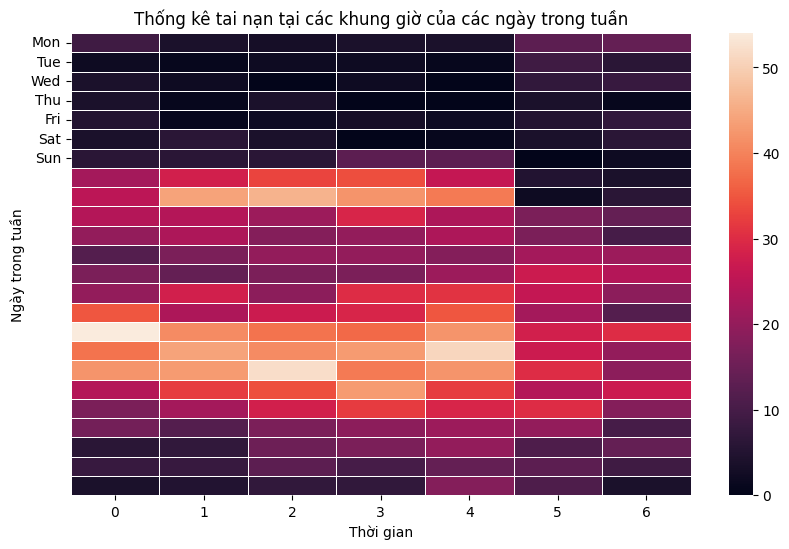

In [29]:
# visualize
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_, linewidths=.5, yticklabels = day_of_week)
ax.set_xlabel('Thời gian')
ax.set_ylabel('Ngày trong tuần')
ax.set_title('Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

- Conclusion: The chart reveals that the highest number of accidents occurs at 15:00 on Monday, 17:00 on Wednesday, and 16:00 on Friday.

### 4.2. Question #2

YOUR ANSWER HERE

- Question: 
- Meaning: 

In [1]:
# YOUR CODE HERE
#raise NotImplementedError()